In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('cosmetics.csv')

In [7]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [9]:
df.shape

(1472, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [11]:
pd.isnull(df).sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [12]:
df[['Price']].describe()

,Price
count,1472.000000
mean,55.584239
std,45.014429
min,3.000000
25%,30.000000
50%,42.500000
75%,68.000000
max,370.000000


# Exploratory Data Analysis

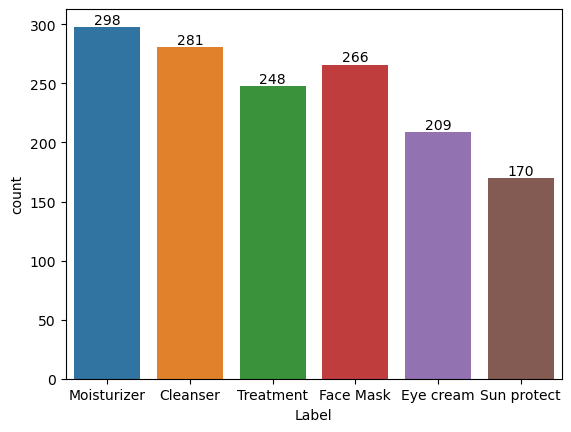

In [33]:
ax = sns.countplot(x='Label', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
df.groupby(['Label'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False)


,Label,Price
3,Moisturizer,20588
5,Treatment,19636
1,Eye cream,13293
2,Face Mask,11338
0,Cleanser,9161
4,Sun protect,7804


<Axes: xlabel='Label', ylabel='Price'>

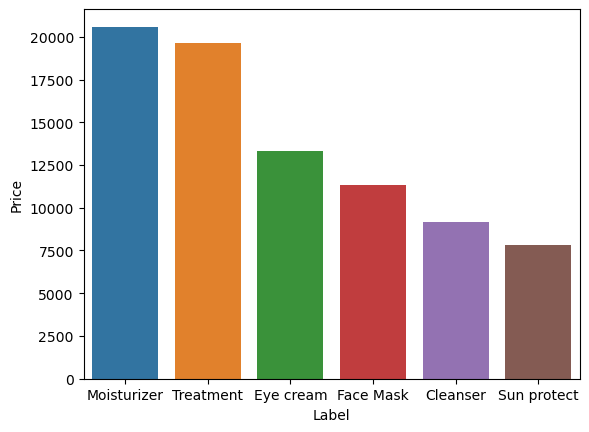

In [32]:
sales_label = df.groupby(['Label'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False)
sns.barplot(x='Label', y='Price', data = sales_label)

 From the above bar chart we can see that the highest earning labels are Moisturizer and Treatment


In [45]:
df.groupby(['Brand'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False).head(10)

,Brand,Price
64,LA MER,5530
94,SHISEIDO,4527
40,FRESH,3308
87,PETER THOMAS ROTH,2761
95,SK-II,2668
76,MURAD,2579
19,CLINIQUE,2575
24,DIOR,2572
86,PERRICONE MD,2564
66,LANCÔME,2360


<Axes: xlabel='Brand', ylabel='Price'>

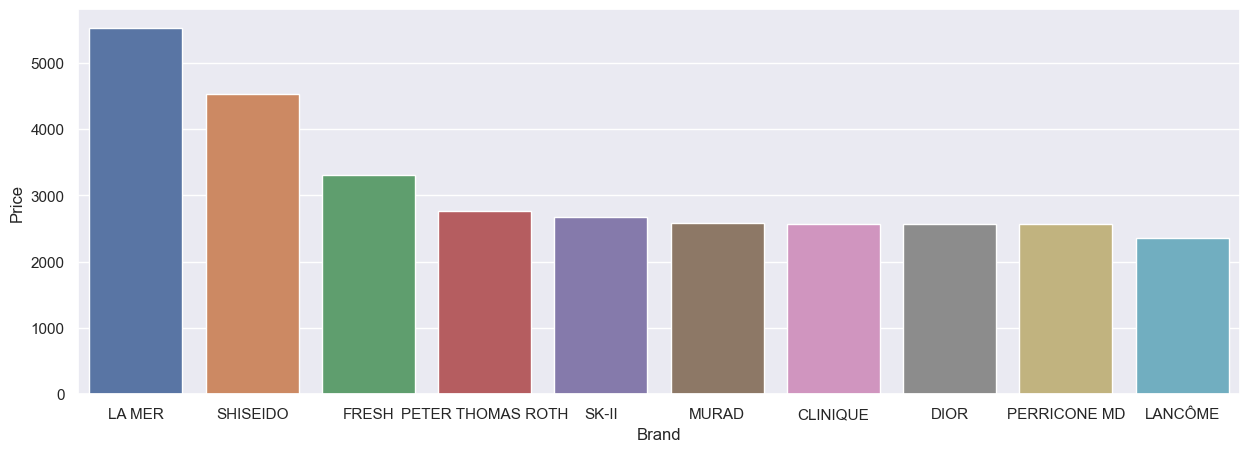

In [44]:
sales_brand = df.groupby(['Brand'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False).head(10)
sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data = sales_brand, x='Brand', y='Price')

The above chart shows the Top 10 selling Brands

In [63]:
df.groupby(['Name'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False).head()

,Name,Price
1244,The Concentrate,370
1271,The Regenerating Serum,345
747,Little Miss Miracle Limited-Edition Crème de l...,325
565,Future Solution LX Intensive Firming Contour S...,300
16,30 Day Treatment,290


<Axes: xlabel='Name', ylabel='Price'>

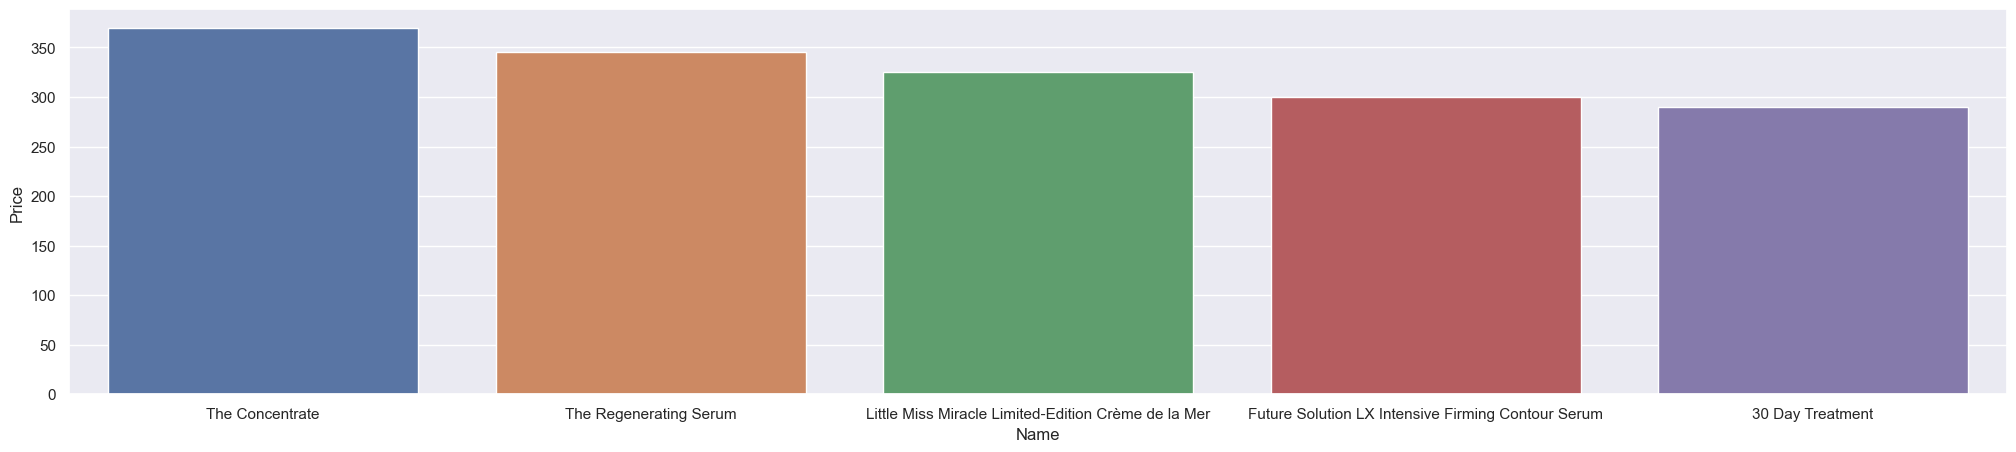

In [70]:
sales_product = df.groupby(['Name'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False).head()
sns.set(rc={'figure.figsize': (25, 5)})
sns.barplot(data = sales_product, x='Name', y='Price')

The above chart shows the top products with high pricing 

In [88]:
df.groupby(['Brand'], as_index=False)['Rank'].mean().sort_values(by='Rank', ascending=False).head(10)

,Brand,Rank
81,NURSE JAMIE,5.000000
18,CLARISONIC,5.000000
8,BIOEFFECT,4.900000
43,GO-TO,4.850000
89,PRIVATE DOCTOR,4.800000
80,NUFACE,4.700000
74,MOON JUICE,4.700000
91,SAND & SKY,4.700000
10,BLACK UP,4.700000
32,ERNO LASZLO,4.628571


In [92]:
Brand_vs_rank = df.groupby(['Brand'], as_index=False)['Rank'].mean().sort_values(by='Rank', ascending=False).head(10)

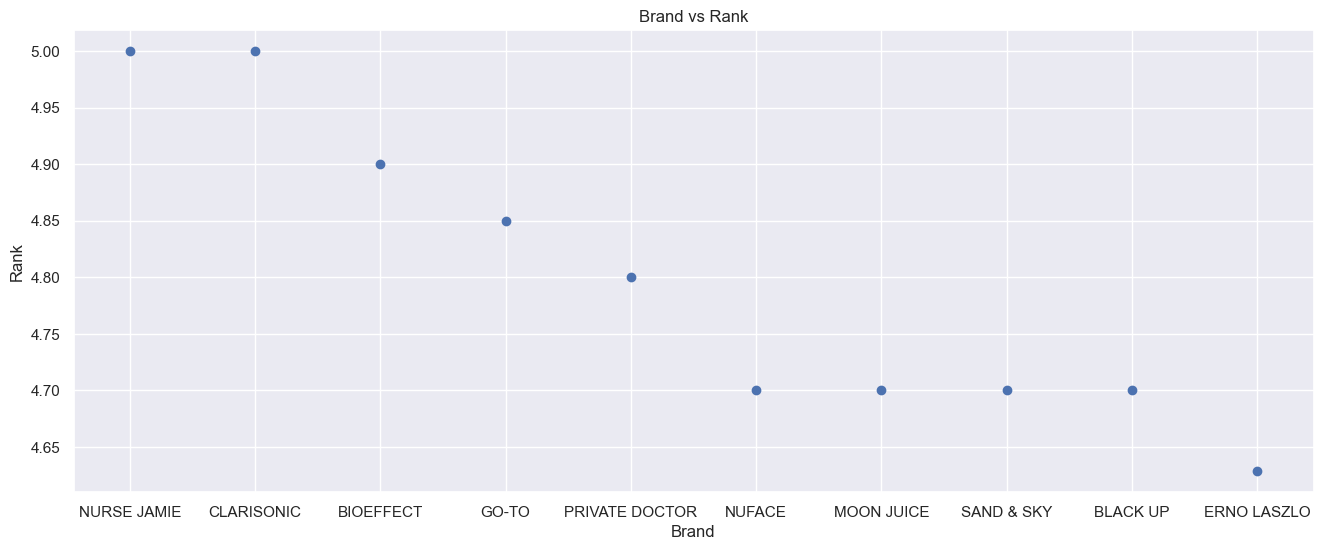

In [95]:
# Scatter plot of price vs. customer ratings
plt.figure(figsize=(16, 6))
plt.scatter(Brand_vs_rank['Brand'], Brand_vs_rank['Rank'])
plt.title('Brand vs Rank')
plt.xlabel('Brand')
plt.ylabel('Rank')
plt.show()


The above scatter chart shows the top Brands with average ranks based on customer ratings

In [96]:
corelation = df.corr()

C:\Users\Diksha Bhargava\AppData\Local\Temp\ipykernel_52516\2195490469.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df.corr()


<Axes: >

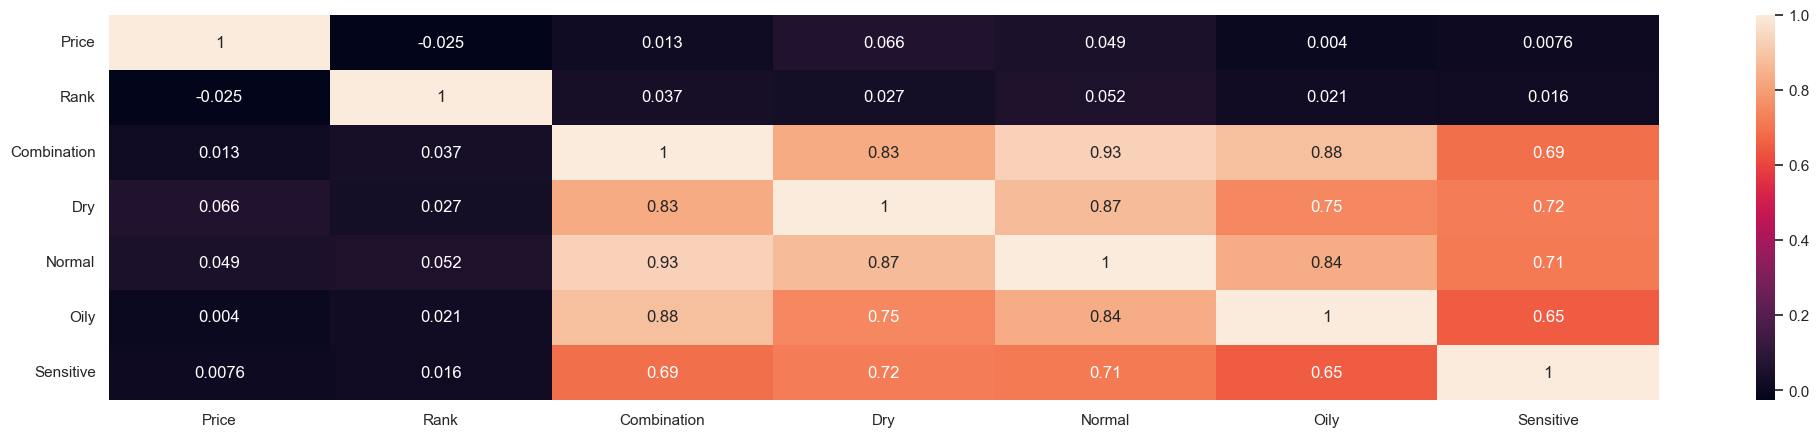

In [97]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
           , annot=True)

### Conclusion:

- Moisturizer tops the list as being the most earning label
- LA mer is the top selling brand
- Concentrate is the most costly product
- Nurse Jamie being the top rated Brand on the basis of customer ratings
- Heatmap shows the correlation between the columns